In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('retailMarketingDI.csv')

In [4]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,12,1304.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
Catalogs       1000 non-null int64
AmountSpent    994 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,994.000000
mean,55916.600000,0.93400,14.682000,1218.188129
std,30748.392284,1.05107,6.622895,961.849079
min,0.000000,0.00000,6.000000,0.000000
25%,29200.000000,0.00000,6.000000,490.250000
50%,53700.000000,1.00000,12.000000,962.500000
75%,76925.000000,2.00000,18.000000,1688.750000
max,168800.000000,3.00000,24.000000,6217.000000


In [7]:
df.replace(np.nan, 0, inplace=True)

In [8]:
df['AmountSpent']=pd.DataFrame(df['AmountSpent'].astype(int)) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
Catalogs       1000 non-null int64
AmountSpent    1000 non-null int32
dtypes: int32(1), int64(3), object(5)
memory usage: 66.5+ KB


In [10]:
df.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'Catalogs', 'AmountSpent'],
      dtype='object')

In [11]:
df1= pd.get_dummies(df[['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'Catalogs', 'AmountSpent']],drop_first=True)

In [12]:
df1.columns

Index(['Salary', 'Children', 'Catalogs', 'AmountSpent', 'Age_Old', 'Age_Young',
       'Gender_Male', 'OwnHome_Rent', 'Married_Single', 'Location_Far'],
      dtype='object')

In [13]:
df1.head()

,Salary,Children,Catalogs,AmountSpent,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far
0,47500,0,6,755,1,0,0,0,1,1
1,63600,0,6,1318,0,0,1,1,1,0
2,13500,0,18,296,0,1,0,1,1,0
3,85600,1,18,2436,0,0,1,0,0,0
4,68400,0,12,1304,0,0,0,0,1,0


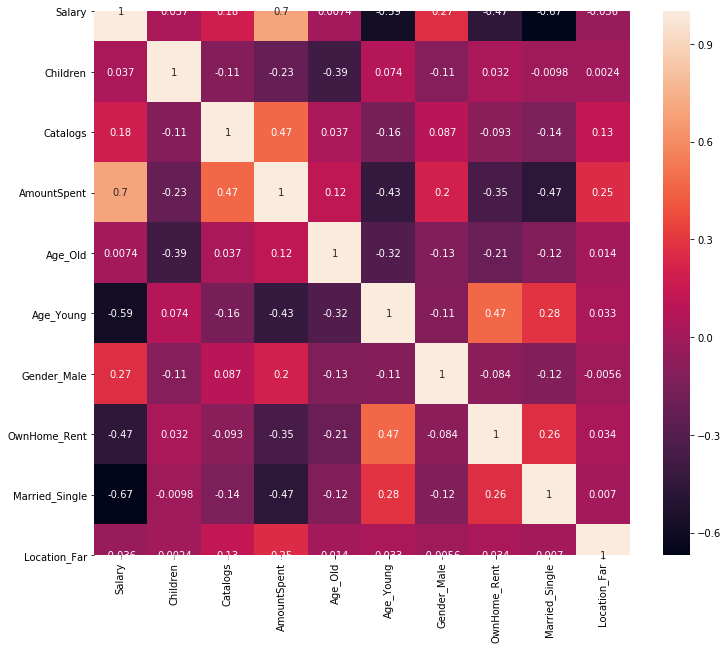

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True)

## Train Test Split

In [113]:
df1.columns

Index(['Salary', 'Children', 'Catalogs', 'AmountSpent', 'Age_Old', 'Age_Young',
       'Gender_Male', 'OwnHome_Rent', 'Married_Single', 'Location_Far'],
      dtype='object')

In [114]:
X = df1[['Children', 'Catalogs', 'AmountSpent', 'Age_Old', 'Age_Young',
       'Gender_Male', 'OwnHome_Rent', 'Married_Single', 'Location_Far']]
y = df1['Salary']

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

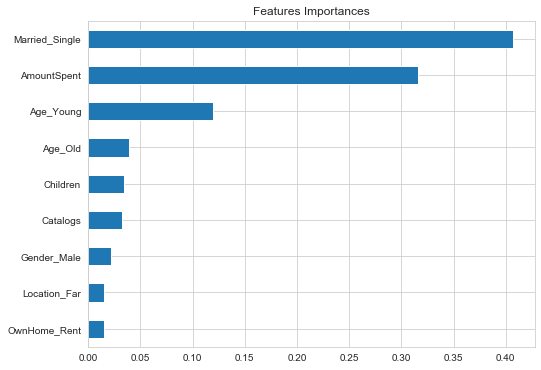

In [102]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
coef1 = pd.Series(rfc.feature_importances_,X_train.columns).sort_values(ascending=False)
coef1.sort_values().plot(kind='barh',title='Features Importances')

In [106]:
predict=rfc.predict(X_test)

Text(0, 0.5, 'predicted Y')

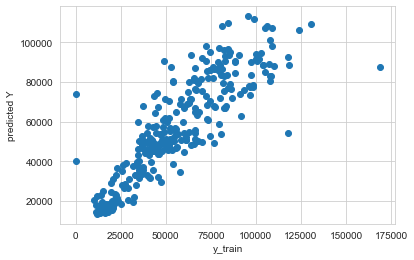

In [120]:
predicts = rfc.predict(X_train)
plt.scatter(y_test, predict)
plt.xlabel('y_train')
plt.ylabel('predicted Y')

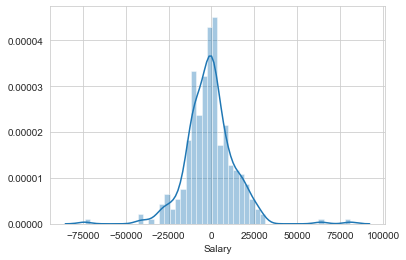

In [108]:
sns.set_style(style='whitegrid')
sns.distplot((y_test-predict),bins=50)

In [112]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('R2 score: ',metrics.r2_score(y_test, predict))

MAE: 9983.891761904762
MSE: 203781244.96683472
RMSE: 14275.196845116872
R2 score:  0.7529448499835707


## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 3.03734053e+03 -5.31410789e+02  1.44857269e+01 -1.17002272e+04
 -2.11878724e+04  5.90748575e+03 -5.37175537e+03 -2.28826563e+04
 -7.53086202e+03]


In [56]:
lm.intercept_

65297.92161275155

In [57]:
pd.DataFrame(index=X_train.columns, data = lm.coef_, columns=['Coefficient'])

,Coefficient
Children,3037.340534
Catalogs,-531.410789
AmountSpent,14.485727
Age_Old,-11700.227187
Age_Young,-21187.872416
Gender_Male,5907.485754
OwnHome_Rent,-5371.755370
Married_Single,-22882.656284
Location_Far,-7530.862022


## Predictions

In [64]:
prediction = lm.predict(X_test)

In [65]:
prediction

array([ 39950.82600379,  50872.56472931,  96906.64359716,  72242.43848289,
        18630.63017995,  18339.6773076 ,  69528.65406233,  16441.68060323,
        68326.46907725,  20110.14561579,  10592.76771541,  92550.69428083,
        72555.37633994,  80460.1820555 ,  24488.39182251,  42092.71554054,
        47467.44405005,  64574.63124393,  56284.32890854,  83138.93609408,
        88290.17459183,  82597.8027086 , 103797.29865449,  50852.68354231,
        27753.28909001,  18741.85387659,  96005.43006704,  53864.36524433,
        46318.53985394,  90279.90009395,  51309.9598729 ,  77520.72119267,
        66179.79636873, 107413.30541402,  81297.4080731 ,  58247.48241722,
        42266.59044535,  77248.6891121 ,  22116.39790474,  21124.14650006,
        19384.25445779,  71632.53560173,  81884.94478299,  48857.91648944,
        82217.96418457,  20195.45516521,  44394.94000259,  78219.13454593,
        19572.56890773,  47804.80024681,  11544.01125577,  52114.4354333 ,
        68074.31126695,  

## Evaluation

Text(0, 0.5, 'predicted Y')

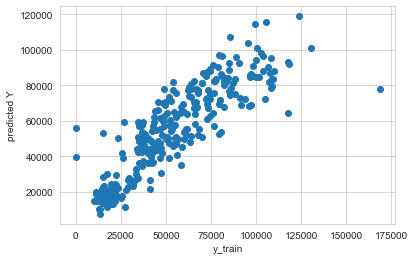

In [123]:
prediction = lm.predict(X_test)
plt.scatter(y_test, prediction)
plt.xlabel('y_train')
plt.ylabel('predicted Y')

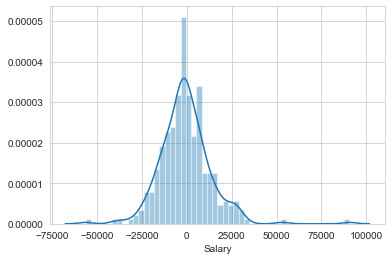

In [125]:
sns.set_style(style='whitegrid')
sns.distplot((y_test-prediction),bins=50)

In [96]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R2 score: ',metrics.r2_score(y_train, predictions))

MAE: 10078.746216562662
MSE: 183912919.30853388
RMSE: 13561.449749511808
R2 score:  0.8152097633041122


In [95]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2 score: ',metrics.r2_score(y_test, prediction))

MAE: 10077.362508152299
MSE: 199559242.6501339
RMSE: 14126.54390323882
R2 score:  0.7580634143337491


In [82]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Children,3037.340534
Catalogs,-531.410789
AmountSpent,14.485727
Age_Old,-11700.227187
Age_Young,-21187.872416
Gender_Male,5907.485754
OwnHome_Rent,-5371.755370
Married_Single,-22882.656284
Location_Far,-7530.862022


## Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

In [23]:
rlm = Ridge(alpha = 0.1, normalize=True)

In [24]:
rlm.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

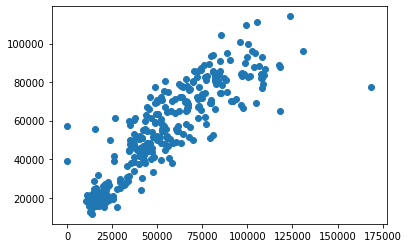

In [25]:
prediction =rlm.predict(X_test)
plt.scatter(y_test, prediction)

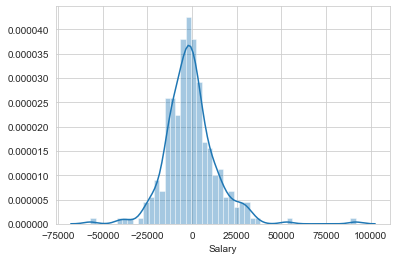

In [26]:
sns.set_style(style='whitegrid')
sns.distplot((y_test-prediction),bins=50)

In [27]:
df['Predictions_ridge']=pd.DataFrame(prediction)

In [28]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent,Predictions_ridge
0,Old,Female,Own,Single,Far,47500,0,6,755,40169.097293
1,Middle,Male,Rent,Single,Close,63600,0,6,1318,49769.989182
2,Young,Female,Rent,Single,Close,13500,0,18,296,93623.877286
3,Middle,Male,Own,Married,Close,85600,1,18,2436,71046.259183
4,Middle,Female,Own,Single,Close,68400,0,12,1304,19039.760032


In [29]:
rlm.intercept_

64259.73833424761

In [30]:
pd.DataFrame(index=X_train.columns, data=rlm.coef_, columns=['Coefficient'])

,Coefficient
Children,2657.138092
Catalogs,-365.653374
AmountSpent,12.705934
Age_Old,-10287.513668
Age_Young,-19821.723552
Gender_Male,6231.937594
OwnHome_Rent,-6420.661279
Married_Single,-22007.409908
Location_Far,-6217.037035


In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2 score: ',metrics.r2_score(y_test, prediction))

MAE: 10098.658182986279
MSE: 204247382.2695591
RMSE: 14291.514344867694
R2 score:  0.7523797262339755


## Lasso Regression

In [32]:
from sklearn.linear_model import Lasso

In [33]:
lim = Lasso(alpha=0.1)

In [34]:
lim.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

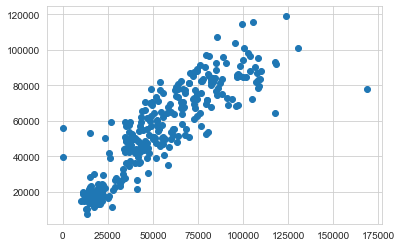

In [35]:
predictions = lim.predict(X_test)
plt.scatter(y_test, predictions)

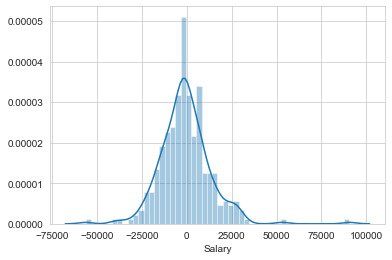

In [36]:
sns.set_style(style='whitegrid')
sns.distplot((y_test-predictions),bins=50)

In [37]:
df['Predictions_lasso']=pd.DataFrame(predictions)

In [38]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent,Predictions_ridge,Predictions_lasso
0,Old,Female,Own,Single,Far,47500,0,6,755,40169.097293,39950.691621
1,Middle,Male,Rent,Single,Close,63600,0,6,1318,49769.989182,50872.639065
2,Young,Female,Rent,Single,Close,13500,0,18,296,93623.877286,96905.861137
3,Middle,Male,Own,Married,Close,85600,1,18,2436,71046.259183,72242.022514
4,Middle,Female,Own,Single,Close,68400,0,12,1304,19039.760032,18631.074080


In [39]:
lim.intercept_

65296.812931316876

In [40]:
pd.DataFrame(index=X_train.columns, data=lim.coef_, columns=['Coefficient'])

,Coefficient
Children,3037.404032
Catalogs,-531.416486
AmountSpent,14.486016
Age_Old,-11699.231864
Age_Young,-21187.226845
Gender_Male,5907.264530
OwnHome_Rent,-5371.428470
Married_Single,-22882.163798
Location_Far,-7530.551748


In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score: ',metrics.r2_score(y_test, predictions))

MAE: 10077.339674848388
MSE: 199558250.30508715
RMSE: 14126.508779775955
R2 score:  0.7580646174079302


## Gradient BoostingREGRESSOR

In [42]:
from sklearn import ensemble

In [43]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)

print('R2 square: ',model_score)
y_predicted = model.predict(X_test)

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

print('RMSE: %.2f'%np.sqrt(metrics.mean_squared_error(y_test, predictions)))



R2 square:  0.9076724906847726
Mean squared error: 182960466.44
Test Variance score: 0.78
RMSE: 14126.51


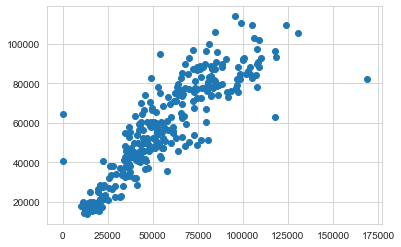

In [45]:
plt.scatter(y_test,y_predicted)

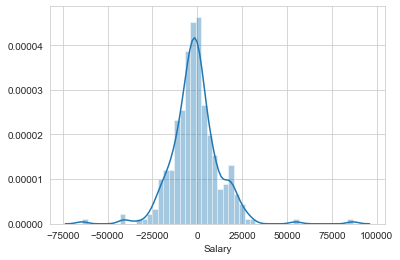

In [46]:
sns.set_style(style='whitegrid')
sns.distplot((y_test-y_predicted),bins=50)

In [47]:
y_predicted

array([ 40479.59209541,  48367.40692359,  96299.00108453,  75893.57284427,
        15758.2222027 ,  18623.76458553,  69555.91380563,  16905.47074607,
        77788.6919512 ,  17360.36556741,  14212.34906341,  90697.51427884,
        77009.85934745,  74231.08964728,  19560.71480558,  32125.6069231 ,
        48036.87159246,  60630.3795481 ,  64224.98013106,  90752.21622422,
        92950.68987221,  82790.20339339, 114095.14682317,  47396.93258528,
        32370.13700515,  19997.1214096 ,  88184.28367907,  56098.84273204,
        42452.43134945, 102810.56939954,  45568.27137994,  75147.44523187,
        66260.34233371,  95929.03688558,  77003.58808939,  52755.21234392,
        39020.54877953,  89749.24227118,  28392.77705646,  17471.86256614,
        17301.5647121 ,  78670.20530811,  77652.35615603,  52646.74350997,
        83186.08880309,  15753.36393588,  56569.18759999,  82088.03564103,
        17301.5647121 ,  51152.39011239,  26316.10031686,  48376.01828311,
        73244.32831724,  

In [48]:
df_predict=pd.DataFrame(y_predicted, columns=['Prediction Result'])

In [49]:
df_predict.head()

,Prediction Result
0,40479.592095
1,48367.406924
2,96299.001085
3,75893.572844
4,15758.222203


In [116]:
import pickle

pickle.dump(rfc, open('project_modeling_1', 'wb'))

In [117]:

loadModel = pickle.load(open('project_modeling_1', 'rb'))

In [118]:
print(str(loadModel))

print("GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None, learning_rate=0.01, loss='ls', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, n_iter_no_change=None, presort='auto', random_state=None, subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False) ")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None, learning_rate=0.01, loss='ls', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, n_iter_no_change=None, presort='auto', random_state=None, subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False) 
